In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv("data/demand_dataset.csv")

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,40,5/28/20,904038.47,0,59.88,2.899,136.648922,5.435
1,2,11/5/20,1780075.62,0,69.43,2.680,211.100664,8.163
2,34,5/27/21,948631.65,0,73.07,3.917,129.060650,10.681
3,2,1/14/21,1852716.82,0,44.78,2.986,211.733123,8.228
4,21,9/21/22,704811.93,0,67.63,3.837,223.250313,6.265
...,...,...,...,...,...,...,...,...
6430,1,7/27/22,1504263.07,0,85.55,3.526,225.792675,6.384
6431,30,3/19/20,423254.69,0,51.26,2.780,210.840851,8.124
6432,8,5/14/20,806787.47,0,64.41,2.855,214.309211,6.293
6433,38,5/4/22,448744.66,0,77.64,4.144,131.117333,11.627


In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')



In [7]:
df.describe()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,22.791298,2021-06-22 21:40:48.671328512,1.035126e+06,0.069619,61.293319,3.362037,172.005884,7.941755
min,1.000000,2020-02-05 00:00:00,2.240312e+05,0.000000,10.030000,2.514000,126.064000,4.077000
25%,11.000000,2020-10-08 00:00:00,5.525252e+05,0.000000,47.135000,2.930500,131.712363,6.833000
50%,23.000000,2021-06-24 00:00:00,9.510740e+05,0.000000,63.820000,3.451000,182.673318,7.858000
75%,34.000000,2022-03-09 00:00:00,1.407823e+06,0.000000,76.285000,3.734000,213.273762,8.592000
max,45.000000,2022-10-26 00:00:00,3.526713e+06,1.000000,99.200000,4.468000,226.979870,14.313000
std,13.041282,NaN,5.611625e+05,0.254524,18.879223,0.465252,39.618065,1.873084


In [8]:
# Detecting outliers using the IQR method for 'Weekly_Sales' in 'df'
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in 'df'
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]

# Proportion of outliers in the dataset
outliers_proportion = num_outliers / df.shape[0]

num_outliers, outliers_proportion


(29, 0.004506604506604507)

In [9]:
display(outliers)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
141,20,2021-04-01,3226066.17,0,35.66,3.633,204.082100,7.187
334,4,2021-01-14,2875347.83,0,38.79,2.979,127.394645,6.316
371,4,2021-12-16,2763984.75,0,41.55,3.119,129.998550,6.143
604,4,2020-12-24,2947166.68,0,38.17,3.156,126.643400,8.129
972,10,2021-04-15,2928060.63,0,58.58,3.840,128.328533,8.404
1373,10,2020-12-24,3526713.39,0,37.24,3.239,126.393280,9.003
1396,10,2020-02-19,2746930.34,0,39.80,2.713,126.446053,8.392
1435,2,2021-06-24,2774548.36,0,84.29,3.654,214.024603,7.856
1641,20,2021-12-02,2785719.40,0,28.61,3.471,209.872613,7.082
1723,20,2020-12-24,2999763.08,0,26.14,3.146,204.603768,7.484


In [10]:
df = df.sort_values(by=['Store', 'Date'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2554,1,2020-02-05,1468128.29,0,58.27,2.575,211.567035,7.058
4437,1,2020-02-12,1457083.36,1,49.24,2.543,211.410991,7.858
6286,1,2020-02-12,1593134.40,1,59.17,2.543,214.511028,7.838
4071,1,2020-02-26,1599263.58,0,47.83,2.521,211.860873,8.163
3797,1,2020-03-05,1504368.41,0,46.69,2.639,214.779103,7.338
...,...,...,...,...,...,...,...,...
5092,45,2022-09-28,821429.60,0,68.75,4.023,190.585953,8.484
6006,45,2022-10-12,981641.61,0,56.63,3.933,192.548353,8.563
1527,45,2022-10-26,743185.30,0,69.88,4.001,191.381800,8.684
4501,45,2022-10-26,763556.31,0,58.61,3.956,192.620436,8.567


In [12]:
aggregated_data = df.groupby(['Store', 'Date']).agg({
    'Weekly_Sales': 'sum',
    'Holiday_Flag': 'max',  # Logical OR for binary flag
    'Temperature': 'mean',  # Average for same store and date might be redundant but keeping for consistency
    'Fuel_Price': 'mean',  # Same as above
    'CPI': 'mean',         # Same as above
    'Unemployment': 'mean' # Same as above
}).reset_index()

aggregated_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2020-02-05,1468128.29,0,58.270,2.575,211.567035,7.058
1,1,2020-02-12,3050217.76,1,54.205,2.543,212.961010,7.848
2,1,2020-02-26,1599263.58,0,47.830,2.521,211.860873,8.163
3,1,2020-03-05,1504368.41,0,46.690,2.639,214.779103,7.338
4,1,2020-03-12,1642644.84,0,54.980,2.728,212.067944,7.058


## Time-series setup for forecasting (train/test split)

To make the forecasting section more interview-ready, we use a **time-based split** (no shuffling):
- Train: first ~80% of weeks  
- Test: last ~20% of weeks  
We evaluate using **RMSE** and **MAPE** and explain how the forecast supports inventory/replenishment decisions.


In [ ]:
# Build a single weekly time series for forecasting (total Weekly_Sales across stores)
weekly_sales = (
    df.groupby('Date')['Weekly_Sales']
      .sum()
      .sort_index()
)

# If there are duplicate dates or missing weeks, we can still model the observed weekly points
# (Optionally, enforce weekly frequency if needed)
# weekly_sales = weekly_sales.asfreq('W-FRI')

# Time-based split (80% train, 20% test)
split_idx = int(len(weekly_sales) * 0.8)
train_series = weekly_sales.iloc[:split_idx]
test_series = weekly_sales.iloc[split_idx:]

len(train_series), len(test_series)


In [13]:
aggregated_data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,4031.000000,4031,4.031000e+03,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000
mean,22.916150,2021-06-23 20:24:35.365914112,1.652452e+06,0.071198,61.238743,3.367390,171.592745,7.951139
min,1.000000,2020-02-05 00:00:00,2.242944e+05,0.000000,10.030000,2.514000,126.064000,4.077000
25%,11.000000,2020-10-15 00:00:00,7.597091e+05,0.000000,47.531667,2.929000,132.323117,6.869250
50%,23.000000,2021-06-24 00:00:00,1.300667e+06,0.000000,63.470000,3.464000,175.285189,7.856000
75%,34.000000,2022-03-02 00:00:00,2.075121e+06,0.000000,75.710000,3.737000,212.928827,8.567000
max,45.000000,2022-10-26 00:00:00,1.207779e+07,1.000000,99.200000,4.430000,226.979870,14.313000
std,13.041047,NaN,1.278595e+06,0.257188,18.234071,0.456329,39.072549,1.811599


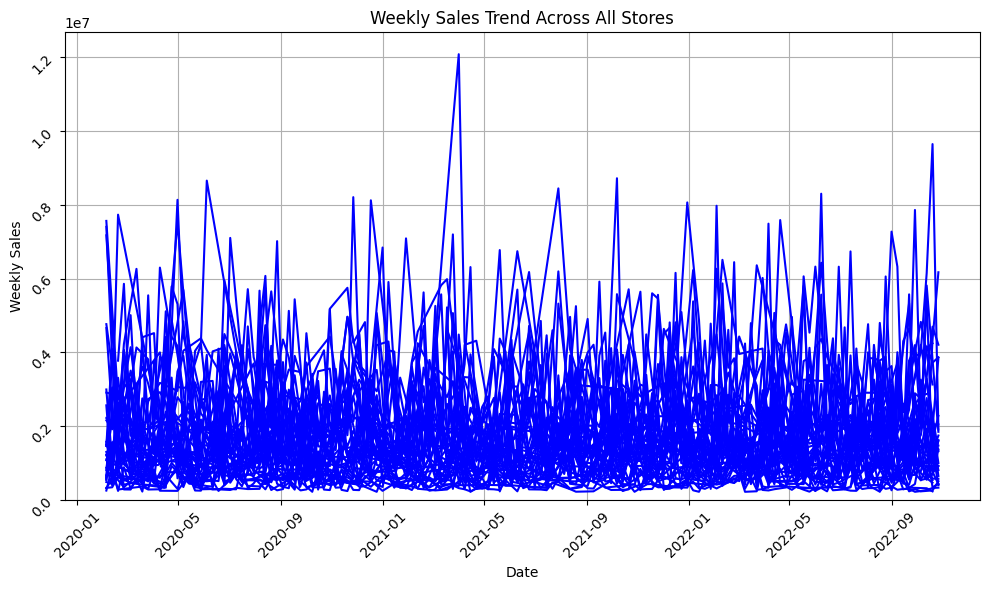

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aggregated_data' is your DataFrame containing the provided data

# Convert 'Date' column to datetime format
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])

# Plot weekly sales trend over time
plt.figure(figsize=(10, 6))
for store in aggregated_data['Store'].unique():
    store_data = aggregated_data[aggregated_data['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}', color='blue')

plt.title('Weekly Sales Trend Across All Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust y-axis limits and ticks
plt.ylim(bottom=0)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\saimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

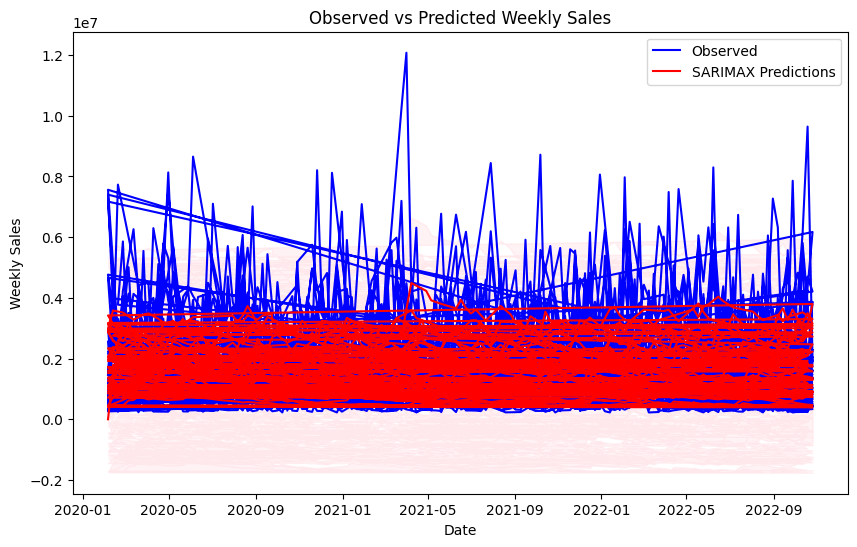

In [54]:
# SARIMAX baseline model (non-seasonal)
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error

# Fit on training data only
sarimax_model = SARIMAX(
    train_series,
    order=(0, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit(disp=False)

# Forecast for the test window
sarimax_pred = sarimax_result.forecast(steps=len(test_series))

# Evaluation metrics
sarimax_rmse = np.sqrt(mean_squared_error(test_series, sarimax_pred))
sarimax_mape = (np.abs((test_series - sarimax_pred) / test_series).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"SARIMAX RMSE: {sarimax_rmse:,.2f}")
print(f"SARIMAX MAPE: {sarimax_mape:.2f}%")


C:\Users\saimi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


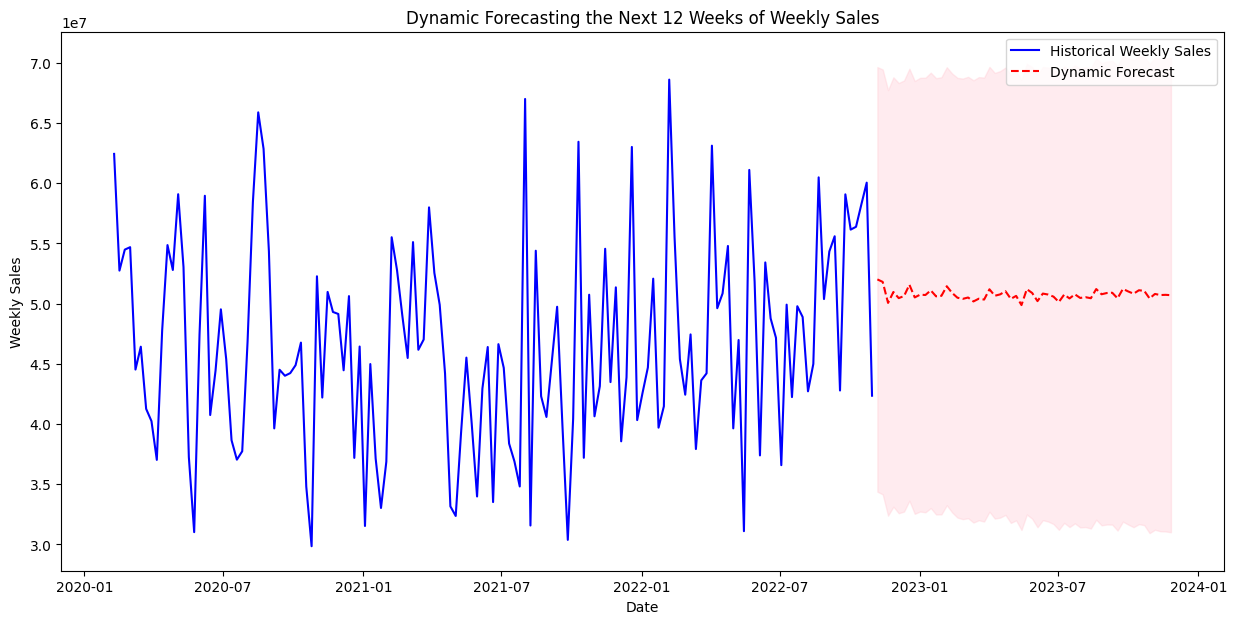

In [58]:
# Seasonal SARIMAX (weekly seasonality ~ 52 weeks)
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

seasonal_model = SARIMAX(
    train_series,
    order=(0, 1, 4),
    seasonal_order=(1, 0, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)
seasonal_result = seasonal_model.fit(disp=False)

# Forecast test window
seasonal_pred = seasonal_result.forecast(steps=len(test_series))

seasonal_rmse = np.sqrt(mean_squared_error(test_series, seasonal_pred))
seasonal_mape = (np.abs((test_series - seasonal_pred) / test_series).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"Seasonal SARIMAX RMSE: {seasonal_rmse:,.2f}")
print(f"Seasonal SARIMAX MAPE: {seasonal_mape:.2f}%")

# Plot train/test + forecast
plt.figure(figsize=(12,5))
train_series.plot(label="Train")
test_series.plot(label="Test")
seasonal_pred.plot(label="Forecast (Test)")
plt.title("Weekly Sales Forecast (Seasonal SARIMAX)")
plt.legend()
plt.show()

# Fit on full series and forecast next 56 weeks for planning
final_model = SARIMAX(
    weekly_sales,
    order=(0, 1, 4),
    seasonal_order=(1, 0, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)
final_result = final_model.fit(disp=False)
future_forecast = final_result.forecast(steps=56)
future_forecast.head()


In [31]:
aggregated_data['Year'] = aggregated_data['Date'].dt.year
aggregated_data['Month'] = aggregated_data['Date'].dt.month

In [36]:
X = aggregated_data[['Store', 'Year', 'Month', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = aggregated_data['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)



Mean Squared Error: 1672077949233.8594


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)


Random Forest Mean Squared Error: 1246318698170.746


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Create Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Decision Tree Mean Squared Error:", dt_mse)

# Create Support Vector Machine (SVM) model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM Mean Squared Error:", svm_mse)

# Create Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Mean Squared Error:", gb_mse)


Decision Tree Mean Squared Error: 2026373925968.6294
SVM Mean Squared Error: 1978760660544.8066
Gradient Boosting Mean Squared Error: 1207836735179.4912


In [39]:
# Evaluate the possibility for Target to propose a reverse factoring solution
target_cost_of_debt = 3.84 

supplier_cost_of_debt = 4.9
savings = supplier_cost_of_debt - target_cost_of_debt
reverse_factoring_potential = savings > 0

if reverse_factoring_potential:
    print(f"Reverse factoring can potentially save suppliers {savings}% on their debt.")
else:
    print("Reverse factoring may not be beneficial for Target's suppliers.")

Reverse factoring can potentially save suppliers 1.0600000000000005% on their debt.
